<a href="https://colab.research.google.com/github/cindy-purity/Data-Analysis/blob/main/Medical_Visualiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1
df = pd.read_csv('//content/medical_examination.csv')
df.head(10)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [3]:
# 2. Add 'overweight' column
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2).apply(lambda x: 1 if x > 25 else 0)

In [4]:
# 3.  Normalize data by making 0 always good and 1 always bad
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)


In [6]:
# 4 Draw categorical plot
def draw_cat_plot():
    pass

In [8]:
# 5  Create DataFrame for cat plot using `pd.melt`
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])


In [9]:
# 6 Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).size().rename(columns={'size': 'total'})


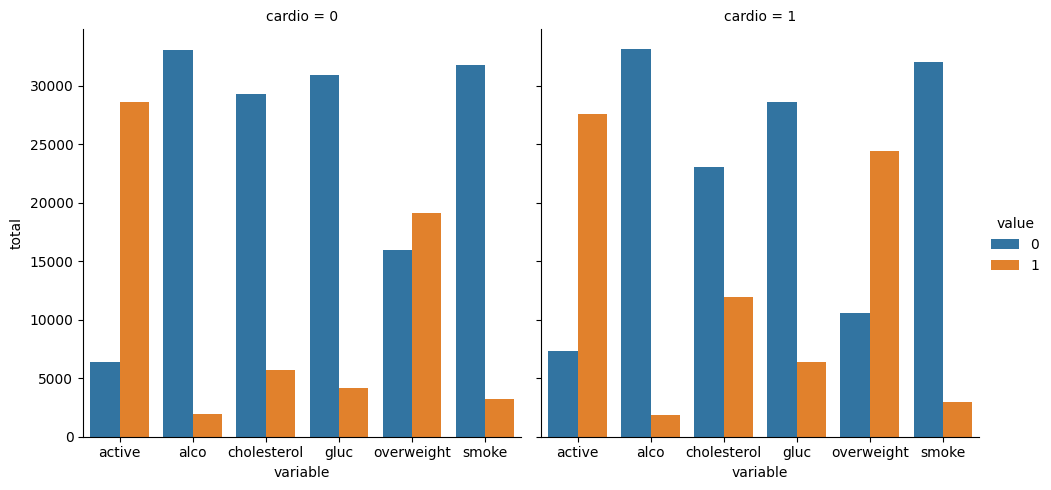

In [10]:
# 7Draw the catplot with 'sns.catplot()'
fig = sns.catplot(data=df_cat, x='variable', y='total', hue='value', col='cardio', kind='bar').fig

In [14]:
 # 9
fig.savefig('catplot.png')


In [30]:
# # 10 draw heat map
def draw_heat_map(df):
  pass

In [32]:
# 11 Clean the data
df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
(df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025))

    ]

In [33]:
# Calculate the correlation matrix
corr = df_heat.corr()

In [34]:
# 13 Generate a mask for the upper triangle
mask = np.triu(corr)

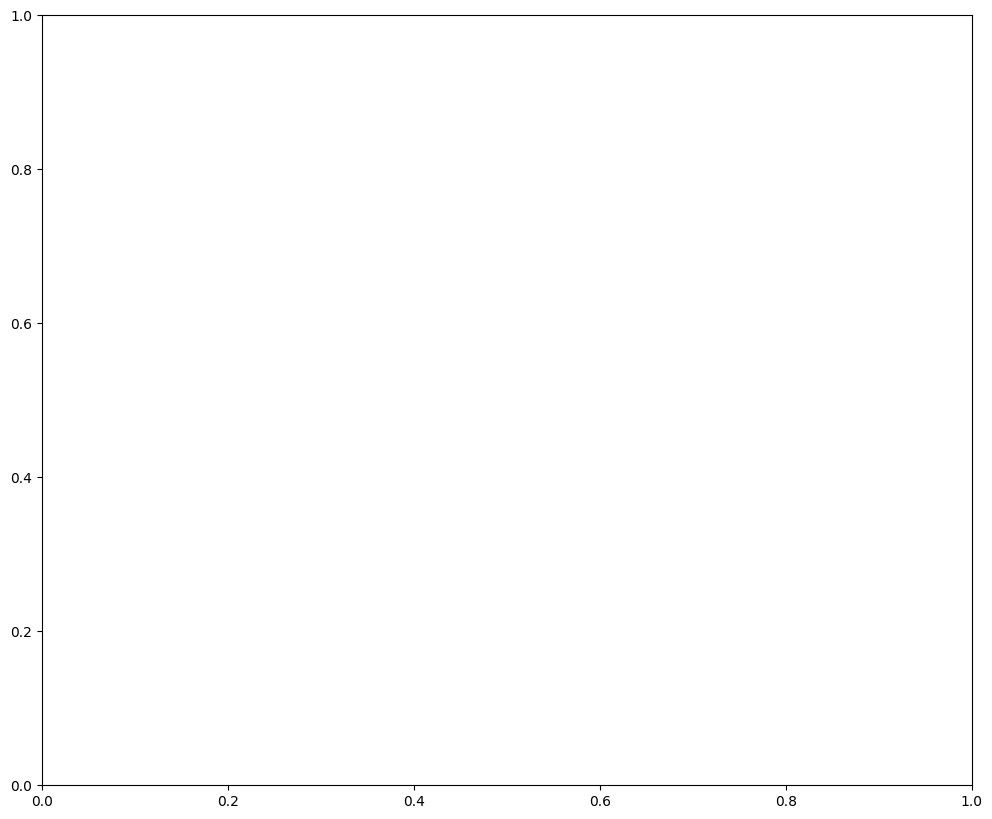

In [35]:
# 14 Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 10))

<Axes: >

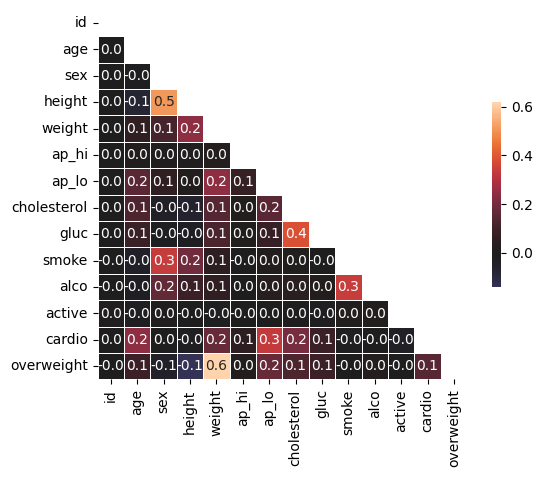

In [36]:
# 15 Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, annot=True, mask=mask, fmt='.1f', center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})

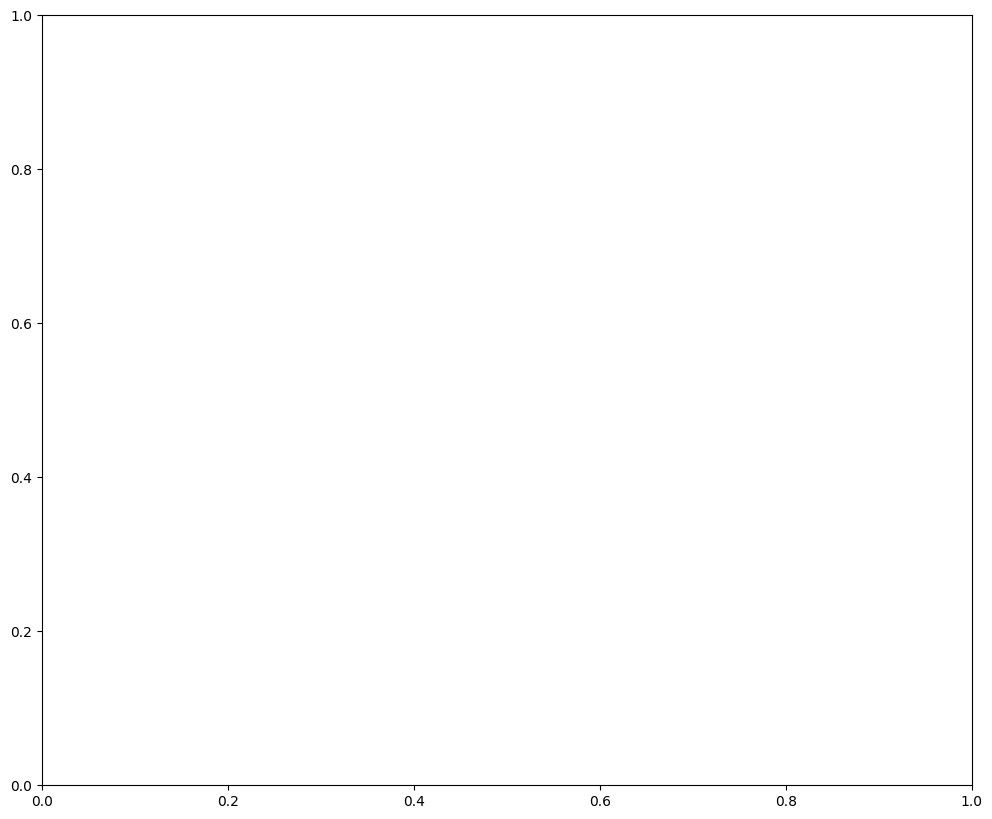

In [40]:
# 16  Return the figure for the output
fig.savefig('heatmap.png')